# Alignment rates of RNAseq reads to F. heteroclitus reference 

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import jaccard distances from sourmash

In [3]:
sourmash_comp_matrix = pd.read_csv("../evaluation/all_v_ncbi.cmp.csv")

In [4]:
rows = sourmash_comp_matrix.columns

In [5]:
sourmash_comp_matrix = sourmash_comp_matrix.set_index(rows)

In [6]:
sourmash_comp_matrix['species'] =  sourmash_comp_matrix.index.values

In [7]:
species = sourmash_comp_matrix.species.str.split(".",n=1,expand=True)[0]

In [8]:
sourmash_comp_matrix = sourmash_comp_matrix.set_index(species)
sourmash_comp_matrix.index.name = 'species'

In [9]:
x_axis_jaccard = sourmash_comp_matrix[['rna.fa']]

In [10]:
x_axis_jaccard = x_axis_jaccard[:-1]

In [11]:
x_axis_jaccard[['rna.fa']] = x_axis_jaccard[['rna.fa']].astype('float')

In [12]:
x_axis_jaccard

,rna.fa
species,
F_xenicus,0.065359
F_catenatus,0.109070
F_chrysotus,0.066424
F_diaphanus,0.114249
F_grandis,0.121405
F_heteroclitusMDPL,0.221701
F_heteroclitusMDPP,0.201000
F_notatus,0.073891
F_nottii,0.089826


# import alignment data

In [107]:
alignment_rate_dir = "../evaluation/alignment_rates_comparison/"
alignment_rate_files = os.listdir(alignment_rate_dir)

In [108]:
alignment_rate_files

['bwa_genome_clipping_alignmentrates',
 'bwa_genome_mismatchgap_alignrates',
 'bwa_txome_clipping_alignrates',
 'STAR_genome_alignmentrates',
 'salmon_denovo_alignrates',
 'bwa_txome_mismatchgap_alignrates',
 'hisat2_genome_alignmentrate',
 'bwa_genome_alignmentrates',
 'bwa_transcriptome_alignmentrates',
 'salmon_Fhet_alignrates']

# salmon with F. het NCBI transcriptoms

In [109]:
salmon_file = alignment_rate_dir + "salmon_Fhet_alignrates"
salmon_data = pd.read_csv(salmon_file,sep=" ",header=None)
rate = salmon_data[[0,7]]
rate.columns = ['sample_info','perc_info']
rate['salmon_alignment_rate'] = rate.perc_info.str.split('%',n=1,expand=True)[0]
rate['sample'] = rate.sample_info.str.split("/",n=2,expand=True)[1]
df = rate[['sample','salmon_alignment_rate']]
df = df.drop_duplicates(subset='sample', keep='first', inplace=False)
df[['genus','species1','other1','other2']] = df['sample'].str.split('_',expand=True)
df["species"] = df["genus"] + "_" + df["species1"]
df = df[['sample','species','salmon_alignment_rate']]
df[['salmon_alignment_rate']] = df[['salmon_alignment_rate']].astype('float')

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
# get mean and sd of df_salmon groupby species
df_salmon_mean = df.groupby("species")["salmon_alignment_rate"].agg([np.mean, np.std])
df_salmon_mean.columns = ['mean_salmonFhet','std_salmonFhet']

In [111]:
# merge with jaccard distances from sourmash
df_salmon = pd.merge(df_salmon_mean,x_axis_jaccard,on = "species")

In [112]:
df_salmon

,mean_salmonFhet,std_salmonFhet,rna.fa
species,,,
F_catenatus,59.184429,4.343153,0.109070
F_chrysotus,54.770188,1.296955,0.066424
F_diaphanus,61.246000,2.470607,0.114249
F_grandis,57.420867,12.006247,0.121405
F_heteroclitusMDPL,64.552211,5.273074,0.221701
F_heteroclitusMDPP,65.770489,4.722945,0.201000
F_notatus,56.591278,2.152217,0.073891
F_nottii,55.099800,NaN,0.089826
F_olivaceus,55.028838,3.442983,0.078874


# salmon with species-specific de novo transcriptomes

In [113]:
salmon_file = alignment_rate_dir + "salmon_denovo_alignrates"
salmon_data = pd.read_csv(salmon_file,sep=" ",header=None)
rate = salmon_data[[0,7]]
rate.columns = ['sample_info','perc_info']
rate['salmon_alignment_rate'] = rate.perc_info.str.split('%',n=1,expand=True)[0]
rate['sample'] = rate.sample_info.str.split("/",n=2,expand=True)[1]
df = rate[['sample','salmon_alignment_rate']]
df = df.drop_duplicates(subset='sample', keep='first', inplace=False)
df[['genus','species1','other1','other2']] = df['sample'].str.split('_',expand=True)
df["species"] = df["genus"] + "_" + df["species1"]
df = df[['sample','species','salmon_alignment_rate']]
df[['salmon_alignment_rate']] = df[['salmon_alignment_rate']].astype('float')

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
# get mean and sd of df_salmon groupby species
df_salmon_mean = df.groupby("species")["salmon_alignment_rate"].agg([np.mean, np.std])
df_salmon_mean.columns = ['mean_salmondenovo','std_salmondenovo']

In [115]:
df_salmon_denovo = pd.merge(df_salmon_mean,x_axis_jaccard,on = "species")

In [116]:
df_salmon_denovo

,mean_salmondenovo,std_salmondenovo,rna.fa
species,,,
F_catenatus,81.182980,2.615629,0.109070
F_chrysotus,81.800800,0.974929,0.066424
F_diaphanus,80.270933,1.800028,0.114249
F_grandis,74.955256,1.485886,0.121405
F_heteroclitusMDPL,75.755189,2.042814,0.221701
F_heteroclitusMDPP,74.023778,3.181816,0.201000
F_notatus,81.458678,1.289989,0.073891
F_nottii,81.702600,NaN,0.089826
F_olivaceus,82.859237,1.403167,0.078874


# hisat2

In [117]:
# I know the files are labeled STAR, this was a typo in my script that named all my jobs with "STAR" prior to running on hpc

In [118]:
hisat2_file = alignment_rate_dir + "hisat2_genome_alignmentrate"
hisat2_data = pd.read_csv(hisat2_file,sep=" ",header=None)

In [119]:
rate = hisat2_data[[0]]
rate.columns = ['sample_info']
rate['hisat2_alignment_rate'] = rate.sample_info.str.split(':',n=1,expand=True)[1]
rate['samples'] = rate.sample_info.str.split(":",n=1,expand=True)[0]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [120]:
rate['sample'] = rate.samples.str.split("/",n=2,expand=True)[1]

In [121]:
rate[['star','genus','species1','condition','other1']] = rate['sample'].str.split('_',expand=True)

In [122]:
rate["species"] = rate["genus"] + "_" + rate["species1"]

In [123]:
rate['replicate'] = rate['genus'] + "_" + rate['species1'] + "_" + rate['condition'] + "_" + rate['other1'].str.split("-",expand=True)[0]

In [124]:
rate['alignment_rate'] = rate['hisat2_alignment_rate'].str.split("%",expand=True)[0]

In [125]:
rate = rate[['replicate','species','alignment_rate']]

In [126]:
rate[['alignment_rate']] = rate[['alignment_rate']].astype('float')

In [127]:
# get mean and sd of df_salmon groupby species
df_hisat2_mean = rate.groupby("species")["alignment_rate"].agg([np.mean, np.std])
df_hisat2_mean.columns = ['mean_hisat2','std_hisat2']

In [128]:
df_hisat2 = pd.merge(df_hisat2_mean,x_axis_jaccard,on = "species")

In [129]:
df_hisat2

,mean_hisat2,std_hisat2,rna.fa
species,,,
F_catenatus,48.815714,1.183960,0.109070
F_chrysotus,32.077500,1.028477,0.066424
F_diaphanus,49.873333,2.151712,0.114249
F_grandis,63.860000,1.497030,0.121405
F_heteroclitusMDPL,76.278889,2.315974,0.221701
F_heteroclitusMDPP,77.720000,2.681832,0.201000
F_notatus,36.821111,0.987743,0.073891
F_nottii,32.405000,0.162635,0.089826
F_olivaceus,36.528750,0.816848,0.078874


# bwa mem genome

In [36]:
bwagenome_file = alignment_rate_dir + "bwa_genome_alignmentrates"
bwagenome_data = pd.read_csv(bwagenome_file,sep=" ",header=None)

In [37]:
rate = bwagenome_data[[0,4]]
rate.columns = ['sample_info','perc_info']
rate['bwagenome_alignment_rate'] = rate.perc_info.str.split('(',n=1,expand=True)[1]
rate['samples'] = rate.sample_info.str.split("/",n=2,expand=True)[1]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [38]:
rate['replicate'] = rate.samples.str.split(".",n=2,expand=True)[0]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
rate['species'] = rate.samples.str.split("_",n=4,expand=True)[0] + "_" + rate.samples.str.split("_",n=4,expand=True)[1] 

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
rate['bwa_mem_genome_alignment_rate'] = rate.bwagenome_alignment_rate.str.split("%",n=1,expand=True)[0].astype('float')

In [41]:
rate = rate[['replicate','species','bwa_mem_genome_alignment_rate']]

In [42]:
# get mean and sd of df_salmon groupby species
df_bwamemgenome_mean = rate.groupby("species")["bwa_mem_genome_alignment_rate"].agg([np.mean, np.std])
df_bwamemgenome_mean.columns = ['mean_bwamem_genome','std_bwamem_genome']

In [43]:
df_bwamemgenome = pd.merge(df_bwamemgenome_mean,x_axis_jaccard,on = "species")

In [44]:
df_bwamemgenome

,mean_bwamem_genome,std_bwamem_genome,rna.fa
species,,,
F_chrysotus,91.680000,0.478271,0.066424
F_diaphanus,94.965000,0.374206,0.114249
F_grandis,95.662500,0.428477,0.121405
F_heteroclitusMDPL,96.248889,0.788344,0.221701
F_heteroclitusMDPP,96.134444,0.781747,0.201000
F_notatus,93.255000,0.605876,0.073891
F_rathbuni,95.573750,0.700692,0.097641
F_sciadicus,92.660000,0.441588,0.084369
F_similis,91.680000,0.479114,0.065499


# bwa mem genome, clipping penalty -L 100 (length of read)

In [45]:
bwagenome_file = alignment_rate_dir + "bwa_genome_clipping_alignmentrates"
bwagenome_data = pd.read_csv(bwagenome_file,sep=" ",header=None)

In [46]:
rate = bwagenome_data[[0,4]]
rate.columns = ['sample_info','perc_info']
rate['bwagenome_clipping_alignment_rate'] = rate.perc_info.str.split('(',n=1,expand=True)[1]
rate['samples'] = rate.sample_info.str.split("/",n=2,expand=True)[1]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [47]:
rate['replicate'] = rate.samples.str.split(".",n=2,expand=True)[0]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
rate['species'] = rate.samples.str.split("_",n=4,expand=True)[0] + "_" + rate.samples.str.split("_",n=4,expand=True)[1] 

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
rate['bwagenome_clipping_alignment_rate'] = rate.bwagenome_clipping_alignment_rate.str.split("%",n=1,expand=True)[0].astype('float')

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
rate = rate[['replicate','species','bwagenome_clipping_alignment_rate']]

In [51]:
# get mean and sd of df_salmon groupby species
df_bwamemgenome_mean = rate.groupby("species")['bwagenome_clipping_alignment_rate'].agg([np.mean, np.std])
df_bwamemgenome_mean.columns = ['mean_bwamem_genome_clipping','std_bwamem_genome_clipping']

In [52]:
df_bwamemgenome_clipping = pd.merge(df_bwamemgenome_mean,x_axis_jaccard,on = "species")

In [53]:
df_bwamemgenome_clipping

,mean_bwamem_genome_clipping,std_bwamem_genome_clipping,rna.fa
species,,,
F_chrysotus,91.291250,0.481944,0.066424
F_diaphanus,94.626667,0.393633,0.114249
F_grandis,95.331111,0.438077,0.121405
F_heteroclitusMDPL,95.897778,0.858673,0.221701
F_heteroclitusMDPP,95.756667,0.827964,0.201000
F_notatus,92.826667,0.624840,0.073891
F_rathbuni,95.192222,0.733634,0.097641
F_sciadicus,92.287500,0.458576,0.084369
F_similis,91.287778,0.502040,0.065499


# bwa mem genome, clipping/gap/mismatch penalties -L 100 -B 40 -O 60

In [54]:
bwagenome_file = alignment_rate_dir + "bwa_genome_mismatchgap_alignrates"
bwagenome_data = pd.read_csv(bwagenome_file,sep=" ",header=None)

In [55]:
rate = bwagenome_data[[0,4]]
rate.columns = ['sample_info','perc_info']
rate['bwagenome_clipping_alignment_rate'] = rate.perc_info.str.split('(',n=1,expand=True)[1]
rate['samples'] = rate.sample_info.str.split("/",n=2,expand=True)[1]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [56]:
rate['replicate'] = rate.samples.str.split(".",n=2,expand=True)[0]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
rate['species'] = rate.samples.str.split("_",n=4,expand=True)[0] + "_" + rate.samples.str.split("_",n=4,expand=True)[1] 

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
rate['bwagenome_clipping_alignment_rate'] = rate.bwagenome_clipping_alignment_rate.str.split("%",n=1,expand=True)[0].astype('float')

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
rate = rate[['replicate','species','bwagenome_clipping_alignment_rate']]

In [60]:
# get mean and sd of df_salmon groupby species
df_bwamemgenome_mean = rate.groupby("species")['bwagenome_clipping_alignment_rate'].agg([np.mean, np.std])
df_bwamemgenome_mean.columns = ['mean_bwamem_genome_gapmismatch','std_bwamem_genome_gapmismatch']

In [61]:
df_bwamemgenome_gapmismatch = pd.merge(df_bwamemgenome_mean,x_axis_jaccard,on = "species")

In [62]:
df_bwamemgenome_gapmismatch

,mean_bwamem_genome_gapmismatch,std_bwamem_genome_gapmismatch,rna.fa
species,,,
F_chrysotus,83.436250,0.809584,0.066424
F_diaphanus,90.650000,0.601963,0.114249
F_grandis,93.197500,0.541103,0.121405
F_heteroclitusMDPL,94.716667,1.065094,0.221701
F_heteroclitusMDPP,94.688889,1.117200,0.201000
F_notatus,86.233333,0.804752,0.073891
F_rathbuni,91.464444,1.142280,0.097641
F_sciadicus,85.027500,0.766306,0.084369
F_similis,84.610000,0.742849,0.065499


# bwa mem txome

In [63]:
bwatranscriptome_file = alignment_rate_dir + "bwa_transcriptome_alignmentrates"
bwatranscriptome_data = pd.read_csv(bwatranscriptome_file,sep=" ",header=None)

In [64]:
rate = bwatranscriptome_data[[0,4]]
rate.columns = ['sample_info','perc_info']
rate['bwatranscriptome_alignment_rate'] = rate.perc_info.str.split('(',n=1,expand=True)[1]
rate['samples'] = rate.sample_info.str.split("/",n=2,expand=True)[1]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [65]:
rate['replicate'] = rate.samples.str.split(".",n=2,expand=True)[0]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
rate['species'] = rate.samples.str.split("_",n=4,expand=True)[0] + "_" + rate.samples.str.split("_",n=4,expand=True)[1] 

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
rate['bwa_mem_transcriptome_alignment_rate'] = rate.bwatranscriptome_alignment_rate.str.split("%",n=1,expand=True)[0].astype('float')

In [68]:
rate = rate[['replicate','species','bwa_mem_transcriptome_alignment_rate']]

In [69]:
# get mean and sd of df_salmon groupby species
df_bwamemtxome_mean = rate.groupby("species")["bwa_mem_transcriptome_alignment_rate"].agg([np.mean, np.std])
df_bwamemtxome_mean.columns = ['mean_bwamem_txome','std_bwamem_txome']

In [70]:
df_bwamemtxome = pd.merge(df_bwamemtxome_mean,x_axis_jaccard,on = "species")

In [71]:
df_bwamemtxome

,mean_bwamem_txome,std_bwamem_txome,rna.fa
species,,,
F_chrysotus,76.215000,1.249846,0.066424
F_diaphanus,77.216667,1.763073,0.114249
F_grandis,68.971111,13.888326,0.121405
F_heteroclitusMDPL,75.183333,5.804731,0.221701
F_heteroclitusMDPP,77.158889,4.712485,0.201000
F_notatus,75.898889,1.909021,0.073891
F_rathbuni,78.261111,1.738889,0.097641
F_sciadicus,76.945000,3.064621,0.084369
F_similis,66.975556,7.545426,0.065499


# bwa mem txome, clipping penalty -L 100 (length of read)

In [72]:
bwatranscriptome_file = alignment_rate_dir + "bwa_txome_clipping_alignrates"
bwatranscriptome_data = pd.read_csv(bwatranscriptome_file,sep=" ",header=None)

In [73]:
rate = bwatranscriptome_data[[0,4]]
rate.columns = ['sample_info','perc_info']
rate['bwatxome_clipping_alignment_rate'] = rate.perc_info.str.split('(',n=1,expand=True)[1]
rate['samples'] = rate.sample_info.str.split("/",n=2,expand=True)[1]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [74]:
rate['replicate'] = rate.samples.str.split(".",n=2,expand=True)[0]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
rate['species'] = rate.samples.str.split("_",n=4,expand=True)[0] + "_" + rate.samples.str.split("_",n=4,expand=True)[1] 

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
rate['bwatxome_clipping_alignment_rate'] = rate.bwatxome_clipping_alignment_rate.str.split("%",n=1,expand=True)[0].astype('float')

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
rate = rate[['replicate','species','bwatxome_clipping_alignment_rate']]

In [78]:
# get mean and sd of df_salmon groupby species
df_bwamemtxome_mean = rate.groupby("species")['bwatxome_clipping_alignment_rate'].agg([np.mean, np.std])
df_bwamemtxome_mean.columns = ['mean_bwamem_txome_clipping','std_bwamem_txome_clipping']

In [79]:
df_bwamemtxome_clipping = pd.merge(df_bwamemtxome_mean,x_axis_jaccard,on = "species")

In [80]:
df_bwamemtxome_clipping

,mean_bwamem_txome_clipping,std_bwamem_txome_clipping,rna.fa
species,,,
F_chrysotus,76.153750,1.246044,0.066424
F_diaphanus,77.126667,1.769731,0.114249
F_grandis,68.871111,13.890408,0.121405
F_heteroclitusMDPL,75.073333,5.817957,0.221701
F_heteroclitusMDPP,77.031111,4.722699,0.201000
F_notatus,75.835556,1.914080,0.073891
F_rathbuni,78.185556,1.743740,0.097641
F_sciadicus,76.877500,3.068565,0.084369
F_similis,66.882222,7.550437,0.065499


# bwa mem txome, clipping/gap/mismatch penalties -L 100 -B 40 -O 60

In [81]:
bwatranscriptome_file = alignment_rate_dir + "bwa_txome_mismatchgap_alignrates"
bwatranscriptome_data = pd.read_csv(bwatranscriptome_file,sep=" ",header=None)

In [82]:
rate = bwatranscriptome_data[[0,4]]
rate.columns = ['sample_info','perc_info']
rate['bwatxome_gapmismatch_alignment_rate'] = rate.perc_info.str.split('(',n=1,expand=True)[1]
rate['samples'] = rate.sample_info.str.split("/",n=2,expand=True)[1]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [83]:
rate['replicate'] = rate.samples.str.split(".",n=2,expand=True)[0]

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
rate['species'] = rate.samples.str.split("_",n=4,expand=True)[0] + "_" + rate.samples.str.split("_",n=4,expand=True)[1] 

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
rate['bwatxome_gapmismatch_alignment_rate'] = rate.bwatxome_gapmismatch_alignment_rate.str.split("%",n=1,expand=True)[0].astype('float')

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
rate = rate[['replicate','species','bwatxome_gapmismatch_alignment_rate']]

In [87]:
# get mean and sd of df_salmon groupby species
df_bwamemtxome_mean = rate.groupby("species")['bwatxome_gapmismatch_alignment_rate'].agg([np.mean, np.std])
df_bwamemtxome_mean.columns = ['mean_bwamem_txome_gapmismatch','std_bwamem_txome_gapmismatch']

In [88]:
df_bwamemtxome_gapmismatch = pd.merge(df_bwamemtxome_mean,x_axis_jaccard,on = "species")

In [89]:
df_bwamemtxome_gapmismatch

,mean_bwamem_txome_gapmismatch,std_bwamem_txome_gapmismatch,rna.fa
species,,,
F_chrysotus,72.077500,1.154194,0.066424
F_diaphanus,75.848333,1.561735,0.114249
F_grandis,67.486250,13.950704,0.121405
F_heteroclitusMDPL,75.572500,5.274320,0.221701
F_heteroclitusMDPP,76.523750,5.120058,0.201000
F_notatus,72.860000,1.894353,0.073891
F_rathbuni,77.050000,1.944158,0.097641
F_sciadicus,73.222500,2.551488,0.084369
F_similis,64.115556,6.985848,0.065499


# STAR

In [141]:
star_file = alignment_rate_dir + "STAR_genome_alignmentrates"
star_data = pd.read_csv(star_file,sep="\t",header=None)

In [142]:
rate = star_data
rate.columns = ['sample_info','perc_info']
rate['STAR_genome_alignment_rate'] = rate.perc_info.str.split('%',n=1,expand=True)[0].astype('float')

In [143]:
rate['samples'] = rate.sample_info.str.split("/",n=2,expand=True)[1]

In [144]:
rate['species'] = rate.samples.str.split("_",n=4,expand=True)[0] + "_" + rate.samples.str.split("_",n=4,expand=True)[1]

In [145]:
rate['replicate_info'] = rate.samples.str.split("_",n=4,expand=True)[3]

In [146]:
rate['replicate'] = rate.samples.str.split("_",n=4,expand=True)[0] + "_" + rate.samples.str.split("_",n=4,expand=True)[1] + "_" + rate.samples.str.split("_",n=4,expand=True)[2] + "_" + rate.replicate_info.str.split("Log",n=1,expand=True)[0]


In [147]:
rate = rate[['replicate','species','STAR_genome_alignment_rate']]

In [148]:
# get mean and sd of df_salmon groupby species
df_star_mean = rate.groupby("species")["STAR_genome_alignment_rate"].agg([np.mean, np.std])
df_star_mean.columns = ['mean_star','std_star']

In [149]:
df_star = pd.merge(df_star_mean,x_axis_jaccard,on = "species")

In [150]:
df_star

,mean_star,std_star,rna.fa
species,,,
F_catenatus,70.620000,2.227106,0.109070
F_chrysotus,56.520000,1.459011,0.066424
F_diaphanus,70.513333,1.951591,0.114249
F_grandis,75.825556,3.200383,0.121405
F_heteroclitusMDPL,81.781111,3.009009,0.221701
F_heteroclitusMDPP,82.238889,3.484194,0.201000
F_notatus,60.947778,1.573243,0.073891
F_nottii,57.005000,1.294005,0.089826
F_olivaceus,60.043750,1.869048,0.078874


# 6 reference alignment methods + salmon de novo together

In [178]:
alldf = pd.merge(df_star,df_salmon,on="species")
alldf = alldf.drop(columns=['rna.fa_x', 'rna.fa_y'])
alldf = pd.merge(alldf,df_hisat2,on="species")
alldf = pd.merge(alldf,df_salmon_denovo,on="species")
alldf = alldf.rename(index=str, columns={"rna.fa_x": "Fhet_jaccard"})
alldf = alldf.drop(columns=['rna.fa_y'])

In [179]:
alldf

,mean_star,std_star,mean_salmonFhet,std_salmonFhet,mean_hisat2,std_hisat2,Fhet_jaccard,mean_salmondenovo,std_salmondenovo
species,,,,,,,,,
F_catenatus,70.620000,2.227106,59.184429,4.343153,48.815714,1.183960,0.109070,81.182980,2.615629
F_chrysotus,56.520000,1.459011,54.770188,1.296955,32.077500,1.028477,0.066424,81.800800,0.974929
F_diaphanus,70.513333,1.951591,61.246000,2.470607,49.873333,2.151712,0.114249,80.270933,1.800028
F_grandis,75.825556,3.200383,57.420867,12.006247,63.860000,1.497030,0.121405,74.955256,1.485886
F_heteroclitusMDPL,81.781111,3.009009,64.552211,5.273074,76.278889,2.315974,0.221701,75.755189,2.042814
F_heteroclitusMDPP,82.238889,3.484194,65.770489,4.722945,77.720000,2.681832,0.201000,74.023778,3.181816
F_notatus,60.947778,1.573243,56.591278,2.152217,36.821111,0.987743,0.073891,81.458678,1.289989
F_nottii,57.005000,1.294005,55.099800,NaN,32.405000,0.162635,0.089826,81.702600,NaN
F_olivaceus,60.043750,1.869048,55.028838,3.442983,36.528750,0.816848,0.078874,82.859237,1.403167


In [180]:
alldf[['Fhet_jaccard']] = alldf[['Fhet_jaccard']].astype('float')

In [181]:
alldf = alldf.sort_values(by=['Fhet_jaccard'],ascending=True)

In [182]:
# This is the dataframe to be plotted.
alldf

,mean_star,std_star,mean_salmonFhet,std_salmonFhet,mean_hisat2,std_hisat2,Fhet_jaccard,mean_salmondenovo,std_salmondenovo
species,,,,,,,,,
F_parvipinnis,46.515000,2.944287,43.424457,1.804062,26.710000,3.121263,0.050145,83.153300,1.590271
L_parva,50.121111,2.281307,49.292456,4.072149,27.895556,1.647818,0.053764,80.816611,1.434253
L_goodei,49.967778,1.637580,46.687689,2.752060,29.051111,2.227467,0.054161,77.046000,2.031459
F_xenicus,55.847500,1.986589,55.375100,2.010143,31.456667,0.950761,0.065359,82.434400,2.554720
F_similis,56.155556,1.478691,48.177767,4.917644,36.833333,2.335974,0.065499,75.993111,1.477629
F_chrysotus,56.520000,1.459011,54.770188,1.296955,32.077500,1.028477,0.066424,81.800800,0.974929
F_notatus,60.947778,1.573243,56.591278,2.152217,36.821111,0.987743,0.073891,81.458678,1.289989
F_olivaceus,60.043750,1.869048,55.028838,3.442983,36.528750,0.816848,0.078874,82.859237,1.403167
F_zebrinus,57.905000,2.036165,52.972925,3.926850,34.647500,0.983713,0.082327,81.141075,4.547584


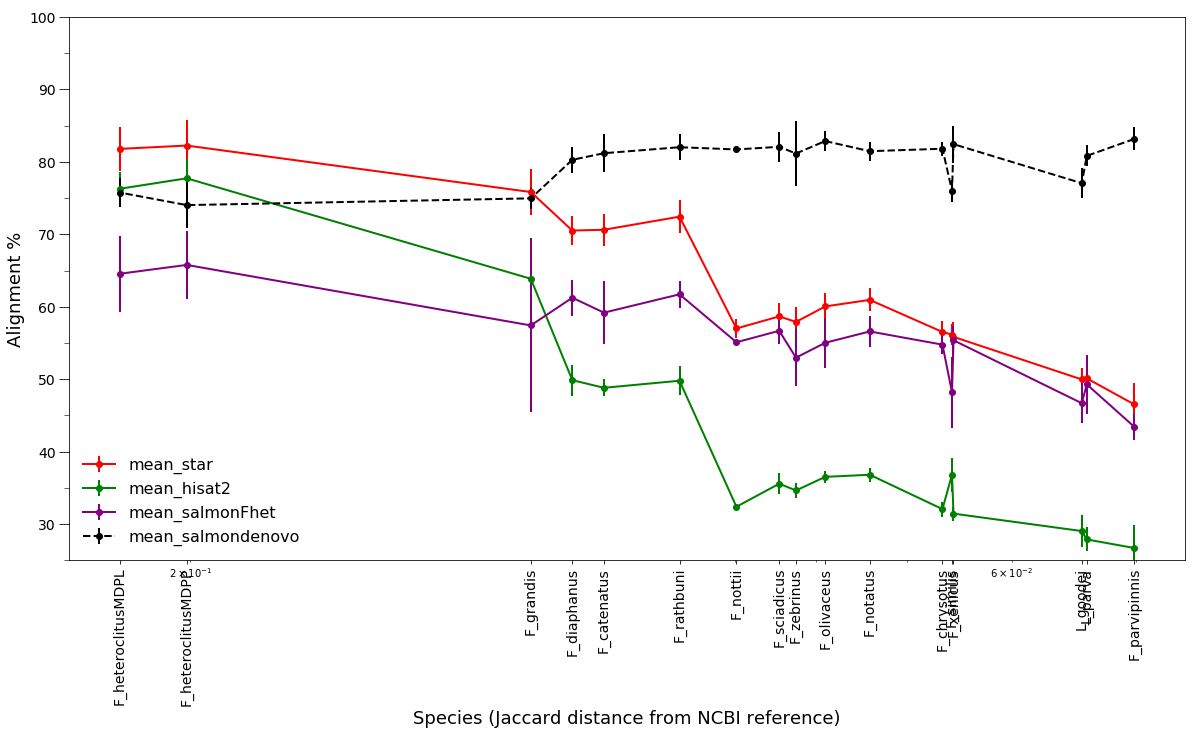

In [183]:
def plotall():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_facecolor('white')
    plt.errorbar(alldf['Fhet_jaccard'],alldf['mean_star'], alldf['std_star'], lw=2, marker='o', color = 'red')
    #ax.errorbar(alldf['Fhet_jaccard'],alldf['mean_bwamem_txome'], alldf['std_bwamem_txome'],lw=2, marker='o', color = 'blue')
    #ax.errorbar(alldf['Fhet_jaccard'],alldf['mean_bwamem_genome'], alldf['std_bwamem_genome'],lw=2, marker='o', color = 'green')
    ax.errorbar(alldf['Fhet_jaccard'],alldf['mean_hisat2'], alldf['std_hisat2'],lw=2, marker='o', color = 'green')
    ax.errorbar(alldf['Fhet_jaccard'],alldf['mean_salmonFhet'], alldf['std_salmonFhet'],lw=2, marker='o', color = 'purple')
    ax.errorbar(alldf['Fhet_jaccard'],alldf['mean_salmondenovo'], alldf['std_salmondenovo'],lw=2, marker='o', linestyle='--', color = 'black')
    #ax.errorbar(alldf['Fhet_jaccard'],alldf['mean_bwamem_genome_clipping'],alldf['std_bwamem_genome_clipping'],lw=2, marker='o', color = 'orange')
    #ax.errorbar(alldf['Fhet_jaccard'],alldf['mean_bwamem_txome_clipping'],alldf['std_bwamem_txome_clipping'],lw=2, marker='o', color = 'cyan')
    #ax.errorbar(alldf['Fhet_jaccard'],alldf['mean_bwamem_genome_gapmismatch'],alldf['std_bwamem_genome_gapmismatch'],lw=2, marker='o', color = 'orange')
    #ax.errorbar(alldf['Fhet_jaccard'],alldf['mean_bwamem_txome_gapmismatch'],alldf['std_bwamem_txome_gapmismatch'],lw=2, marker='o', color = 'cyan')
    ax.legend(loc='lower left', frameon=False,fontsize=16)
    fig = ax.get_figure()
    ax.invert_xaxis()
    ax.set_xscale("log")
    plt.yticks(fontsize=14)
    plt.ylim((25,100))
    ax.set_yticks(np.arange(25, 100, 10),minor=True,)
    ax.yaxis.set_tick_params(length=10)
    ax.yaxis.set_tick_params(which="minor",length=5)
    plt.xticks(alldf['Fhet_jaccard'],alldf.index, rotation=90,fontsize=14)
    ax.set_ylabel('Alignment %', fontsize=18)
    ax.set_xlabel('Species (Jaccard distance from NCBI reference)', fontsize=18)
    fig.show()
    plt.savefig('Fig3.png', dpi=300, bbox_inches='tight')

plotall()